In [8]:
import pandas as pd
import ktrain
from ktrain import text
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import disarray

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [26]:
DATA_PATH = 'Reg_train_dep_prepro_one_encode.csv'
NUM_WORDS = 50000
MAXLEN = 70
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'text_cleaned',
                      label_columns = ["severe", "moderate", "mild"],
                      val_filepath="Reg_test_dep_prepro_one_encode.csv", # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

detected encoding: utf-8 (if wrong, set manually)
['severe', 'moderate', 'mild']
   severe  moderate  mild
0  0.0     1.0       0.0 
1  0.0     1.0       0.0 
2  0.0     1.0       0.0 
3  0.0     0.0       1.0 
4  0.0     1.0       0.0 
['severe', 'moderate', 'mild']
   severe  moderate  mild
0  0.0     0.0       1.0 
1  0.0     1.0       0.0 
2  0.0     0.0       1.0 
3  0.0     0.0       1.0 
4  0.0     1.0       0.0 
language: en
Word Counts: 33286
Nrows: 58684
58684 train sequences
train sequence lengths:
	mean : 21
	95percentile : 43
	99percentile : 49
x_train shape: (58684,70)
y_train shape: (58684, 3)
Is Multi-Label? False
14671 test sequences
test sequence lengths:
	mean : 21
	95percentile : 42
	99percentile : 48
x_test shape: (14671,70)
y_test shape: (14671, 3)


In [27]:
model = text.text_classifier('fasttext', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 70
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1834/1834 [==============================] - 51s 27ms/step - loss: 1.2367 - accuracy: 0.4040
Epoch 2/1024
1834/1834 [==============================] - 1s 258us/step - loss: 2.8614 - accuracy: 0.3524


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


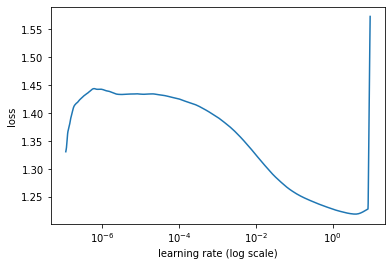

In [28]:
learner.lr_find()
learner.lr_plot()

In [29]:
learner.autofit(0.01)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/1024
1834/1834 [==============================] - 60s 32ms/step - loss: 0.7471 - accuracy: 0.6619 - val_loss: 0.4837 - val_accuracy: 0.8060
Epoch 2/1024
1834/1834 [==============================] - 54s 29ms/step - loss: 0.5362 - accuracy: 0.7791 - val_loss: 0.4290 - val_accuracy: 0.8325
Epoch 3/1024
1834/1834 [==============================] - 54s 29ms/step - loss: 0.4754 - accuracy: 0.8086 - val_loss: 0.4162 - val_accuracy: 0.8399
Epoch 4/1024
1834/1834 [==============================] - 57s 31ms/step - loss: 0.4391 - accuracy: 0.8282 - val_loss: 0.4098 - val_accuracy: 0.8389
Epoch 5/1024
1834/1834 [==============================] - 54s 30ms/step - loss: 0.4080 - accuracy: 0.8440 - val_loss: 0.4060 - val_accuracy: 0.8434
Epoch 6/1024
1834/1834 [==============================] - 55s 30ms/step - los

In [30]:
learner.validate(class_names=preproc.get_classes())

              precision    recall  f1-score   support

      severe       0.87      0.78      0.82      3065
    moderate       0.79      0.86      0.82      5621
        mild       0.89      0.87      0.88      5985

    accuracy                           0.84     14671
   macro avg       0.85      0.83      0.84     14671
weighted avg       0.85      0.84      0.84     14671



array([[2384,  562,  119],
       [ 283, 4819,  519],
       [  71,  729, 5185]], dtype=int64)

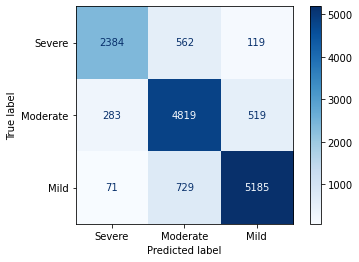

In [31]:
labels = ["Severe", "Moderate", "Mild"]

cm = np.array([[2384,  562,  119],
       [ 283, 4819,  519],
       [  71,  729, 5185]])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [33]:

dfmetric = pd.DataFrame(cm, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
round(dfmetric.da.export_metrics(), 3)

,s,m,mi,micro-average
accuracy,0.929,0.857,0.902,0.896
f1,0.822,0.822,0.878,0.844
false_discovery_rate,0.129,0.211,0.110,0.156
false_negative_rate,0.222,0.143,0.134,0.156
false_positive_rate,0.031,0.143,0.073,0.078
negative_predictive_value,0.943,0.906,0.910,0.922
positive_predictive_value,0.871,0.789,0.890,0.844
precision,0.871,0.789,0.890,0.844
recall,0.778,0.857,0.866,0.844
sensitivity,0.778,0.857,0.866,0.844


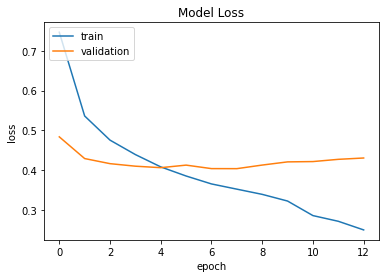

In [34]:
learner.plot("loss")

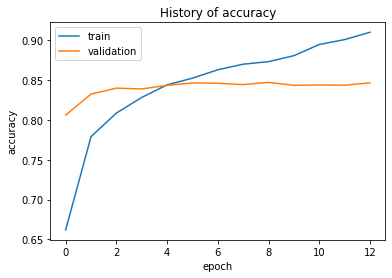

In [35]:
learner.plot("accuracy")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           3200000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [2]:

df[["text_cleaned", "label"]].to_csv("Reg_final_annotation_dep.csv", header=True, index=False, encoding='utf-8')